In [2]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import skimage.exposure
import skimage.util
import vtk
from vtk.util import numpy_support

In [8]:
data = tifffile.imread("src/assets/heart.tif")
data = data.T
data.shape

(157, 157, 201)

In [10]:
def get_cylinder_mask(data, *, width: float) -> npt.NDArray[np.bool_]:
    """
    Get a circular mask that is 1 inside and 0 outside the circle.

    The circle touches the edges of the image.
    """
    nx, ny, nz = data.shape
    X, Y = np.meshgrid(
        np.linspace(-0.5, 0.5, nx, endpoint=True),
        np.linspace(-0.5, 0.5, ny, endpoint=True),
        indexing="ij",
    )
    circle_mask = (X**2 + Y**2) <= (width / 0.5)**2
    return np.tile(circle_mask[:, :, np.newaxis], (1, 1, nz))

mask = get_cylinder_mask(data, width=1)
mask.shape

(157, 157, 201)

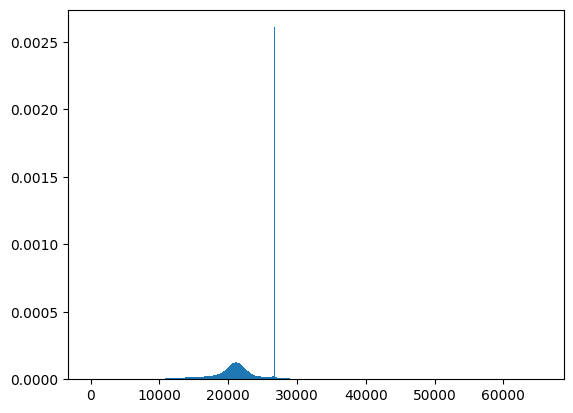

In [11]:
#plt.imshow(data[:, :, 100])
plt.hist(data[mask], bins='auto', density=True);

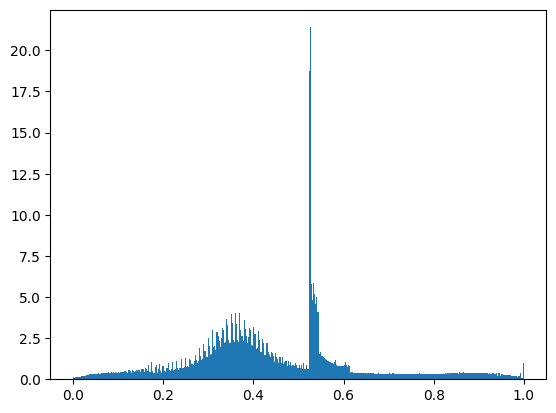

In [12]:
data = data.astype(np.float32) / data.max()
# data[~mask] = 0
data[mask] = skimage.exposure.equalize_adapthist(data[mask])
plt.hist(data[mask], bins='auto', density=True);

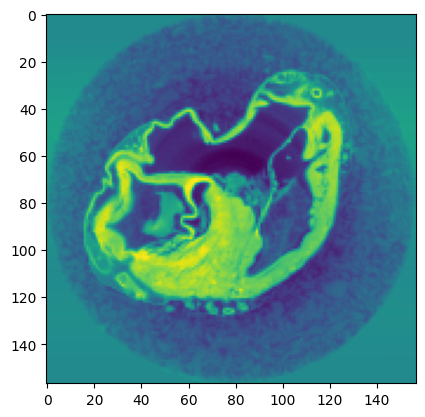

In [13]:
plt.imshow(skimage.util.img_as_ubyte(data[:, :, 100]))

In [14]:
vtk_image_data = vtk.vtkImageData()
vtk_image_data.SetDimensions(data.shape)
vtk_image_data.GetPointData().SetScalars(numpy_support.numpy_to_vtk(np.swapaxes(skimage.util.img_as_ubyte(data), 0, 2).ravel(), deep=True))
writer = vtk.vtkXMLImageDataWriter()
writer.SetFileName("src/assets/heart.vti")
writer.SetInputData(vtk_image_data)
writer.Write()

1

In [43]:
np.percentile(data, [5, 95])

array([ 54., 206.])

(array([0.00039808, 0.00016246, 0.00019422, 0.00023093, 0.00026036,
        0.00030383, 0.00031399, 0.00031867, 0.00032987, 0.00036215,
        0.00043323, 0.00044781, 0.00041553, 0.00035356, 0.00033221,
        0.00035825, 0.00035486, 0.00036137, 0.00038741, 0.00041006,
        0.00044937, 0.00045432, 0.00050457, 0.00054232, 0.00063136,
        0.00062954, 0.0006712 , 0.00072613, 0.00078523, 0.0008222 ,
        0.00090499, 0.00098701, 0.00106121, 0.0011138 , 0.0011453 ,
        0.00123148, 0.00132417, 0.00134161, 0.00143456, 0.00153375,
        0.00161056, 0.00173188, 0.00188315, 0.00198677, 0.00219479,
        0.00241193, 0.00264651, 0.0028134 , 0.00306151, 0.00324376,
        0.00351583, 0.00373948, 0.00396937, 0.00415292, 0.00445129,
        0.00476346, 0.00497747, 0.0051329 , 0.0053943 , 0.00560805,
        0.00591266, 0.00601602, 0.00641853, 0.00662786, 0.00694107,
        0.00728421, 0.00766772, 0.00813453, 0.00868779, 0.00935325,
        0.0099755 , 0.01103541, 0.01241607, 0.01

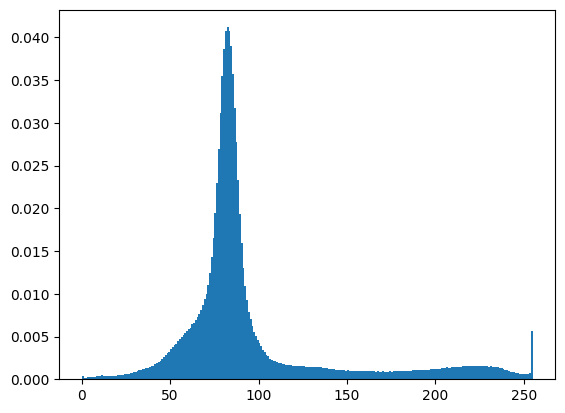

In [58]:
plt.hist(data[mask], bins='auto', density=True)

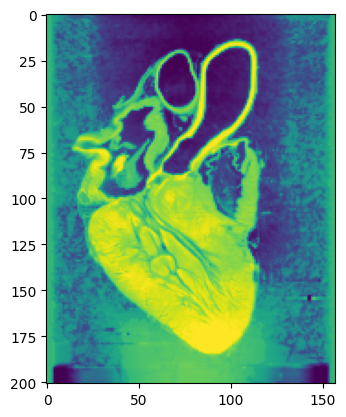

In [45]:
plt.imshow(skimage.exposure.equalize_hist(data[:, :, 100]))